In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


In [37]:
dataSet = pd.read_csv('D:/college/Level3/AI/project/AIP/Dataset/archive/emnist-letters-train.csv')


In [38]:
dataSet.rename(columns={'23':'label'}, inplace=True)

In [39]:
dataSet.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:

dataSet.describe()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
count,88799.000000,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,...,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.0,88799.0
mean,13.519161,0.0,0.0,0.0,0.000011,0.003987,0.016757,0.024640,0.021487,0.017140,...,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502906,0.0,0.0,0.0,0.003356,0.544042,1.547695,1.915987,1.803280,1.620203,...,0.0,0.0,0.0,0.823450,0.107386,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,1.000000,107.000000,213.000000,217.000000,214.000000,216.000000,...,0.0,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [41]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88799 entries, 0 to 88798
Columns: 785 entries, label to 0.415
dtypes: int64(785)
memory usage: 531.8 MB


In [42]:
#X is a numpy list that contains all the columns after 0 (the images) 
x = dataSet.iloc[:,1:].values
#y is a numpy list that contains the column 0 (the labels) 
y = dataSet.iloc[:,0].values

In [43]:


kf = KFold(n_splits=150)

for train_index, test_index in kf.split(x):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train,x_test = x[train_index], x[test_index]
    y_train,y_test = y[train_index], y[test_index]

print('Original X Shape is ' , x_train.shape)


TRAIN: [  592   593   594 ... 88796 88797 88798] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

In [44]:
print('Original X Shape is ' , x_train.shape)

Original X Shape is  (88208, 784)


In [45]:
#TRAIN DATA WITH THE MODEL
#distributing the data (preprocessing) so that it has a mean value 0 and std deviation of 1

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
print('original shape X is', x_train.shape)


original shape X is (88208, 784)


In [46]:
#to start using the random forest classifier so we can train the algorithm using the data we are preparing
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=150, criterion = 'entropy', random_state=42, min_samples_split =6, min_samples_leaf=1, max_depth=90, bootstrap=False)


In [47]:
#start using decision trees model
from  sklearn.tree  import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)


In [48]:
#start the training
rf_model.fit(x_train,y_train)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [49]:

#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.multioutput import MultiOutputClassifier
#from sklearn.datasets import make_multilabel_classification
#from sklearn.preprocessing import MultiLabelBinarizer


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(model, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = model.predict(x_train)
        model_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{model_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = model.predict(x_test)
        model_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{model_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [50]:
#from sklearn library we used accuracy_score to get the model accuracy ( %)
#from sklearn.metrics import accuracy_score

print("Random forest::")
print_score(rf_model, x_train, y_train, x_test, y_test, train=True)
print_score(rf_model, x_train, y_train, x_test, y_test, train=False)
print("================================================")
print("Decision tree::")
print_score(dt_model, x_train, y_train, x_test, y_test, train=True)
print_score(dt_model, x_train, y_train, x_test, y_test, train=False)


Random forest::
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                1       2       3       4       5       6       7       8  \
precision     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
recall        1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
f1-score      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
support    3367.0  3374.0  3392.0  3385.0  3414.0  3369.0  3372.0  3399.0   

                9      10  ...      20      21      22      23      24  \
precision     1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0   
recall        1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0   
f1-score      1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0   
support    3412.0  3383.0  ...  3401.0  3395.0  3400.0  3394.0  3412.0   

               25      26  accuracy  macro avg  weighted avg  
precision     1.0     1.0       1.0        1.0         

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

clf = rf_model #Initialize with whatever parameters you want to

# 10-Fold Cross validation
print(np.mean(cross_val_score(clf, x_train, y_train, cv=10)))

0.8853051558831597


In [70]:

# 10-Fold Cross validation
print(np.mean(cross_val_score(dt_model, x_train, y_train, cv=10)))

0.7012062240155102


In [59]:
y_predict_train= rf_model.predict(x_train)

print(y_train[12:23])#random sample 12:23
print('============================')
print(y_predict_train[12:23])
print('============================')

y_predict_train = dt_model.predict(x_train)
print(y_train[12:23])
print('============================')
print(y_predict_train[12:23])

[21 26 21 21 24 19  5  2 25  9  5]
[21 26 21 21 24 19  5  2 25  9  5]
[21 26 21 21 24 19  5  2 25  9  5]
[21 26 21 21 24 19  5  2 25  9  5]


In [60]:
y_predict = rf_model.predict(x_test)
print(y_test[12:23]) #random sample 12:23
print('============================')
print(y_predict[12:23])
print('============================')

y_predict = dt_model.predict(x_test)
print(y_test[12:23])
print('============================')
print(y_predict[12:23])

[10 20 24 22  1  3 23 20 11 16 26]
[10 20 24 22 26  3 23 20 11 16 26]
[10 20 24 22  1  3 23 20 11 16 26]
[24 20 24 22 26  3 23 20 11  6  9]


In [172]:
import cv2

img = cv2.imread('D:/college/Level3/AI/Project/AIP/image/10.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #to make it in gray scale

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU) #to make it binary

# helps in detecting the chars
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 10))
threshed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, rect_kernel)

#find the Contours of an image then create boundingRect 
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [173]:
images_char = []
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr) #to get x-axis, y-axis, width, hight.

    roi = img[y:y + h, x:x + w] #it gets the position of every char

    area = w*h  #area of the char

    if area > 250 : # we want the area that is bigger than 250 pixel to ignor all the small things on the image
        rect = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2) #draw the rectangle
        images_char.append(gray[y: y + h, x :x + w ]) #take all chars from the gray image and append to list  


#change the size to 28x28 and convert it to vector
for i in range(len(images_char)):
    images_char[i] = cv2.resize(images_char[i],(28,28)).flatten()

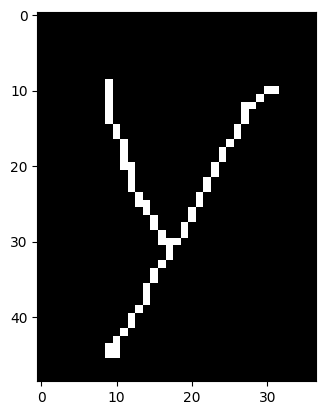

In [174]:
import matplotlib.pyplot as plt
#befor detecting all chars 
plt.imshow(thresh,cmap='gray')

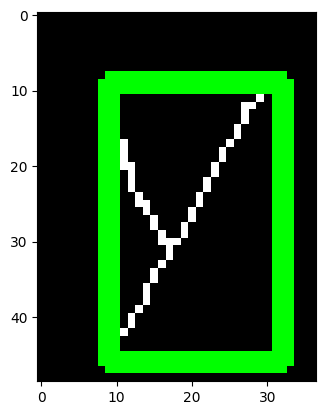

In [175]:
#after detecting all chars 
plt.imshow(rect)

In [176]:
#transform StandardScaler
images_char = ss.transform(images_char)

In [177]:
#the detected word in numbers
rf_word_in_num =  rf_model.predict(images_char)
print(rf_word_in_num)
dt_word_in_num =  dt_model.predict(images_char)
print(dt_word_in_num)

[25]
[25]


In [178]:
#change array of numbers to string
rf_out = ''
for x in rf_word_in_num:
    rf_out += chr(64+x)
dt_out = ''
for x in dt_word_in_num:
      dt_out += chr(64+x)

In [179]:
print('RF out:  '+rf_out)
print('DT out:  '+dt_out)

RF out:  Y
DT out:  Y


In [61]:

y_pred = rf_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  3]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 25  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  2  0  7  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0
   0  1]
 [ 0  0  1  0 21  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 22  1  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
   0  0]
 [ 0  0  2  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0]
 [ 2  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  1 17  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  1  0  0  1
   0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0

In [62]:
y_pred=rf_model.predict(x_test)

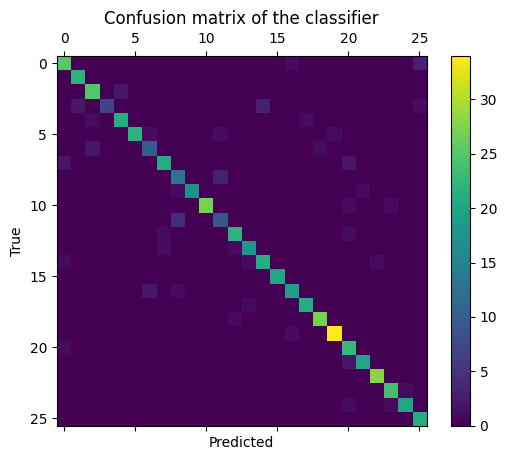

In [63]:

cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

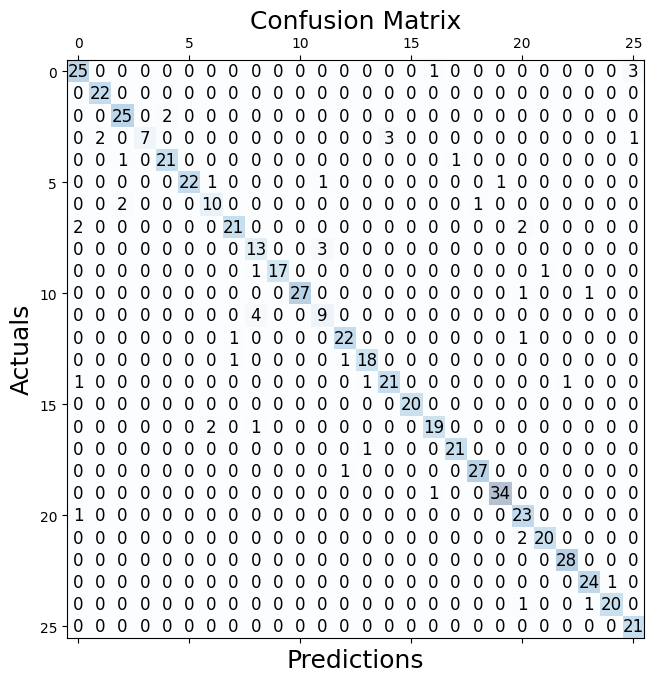

In [64]:
matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score
#predicting the data
#y_pred_cnb = rf_model.predict(X_test)
y_prob_pred_cnb = rf_model.predict_proba(x_test)

#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')

0.997240359043099

In [66]:
y_predict = dt_model.predict(x_test)

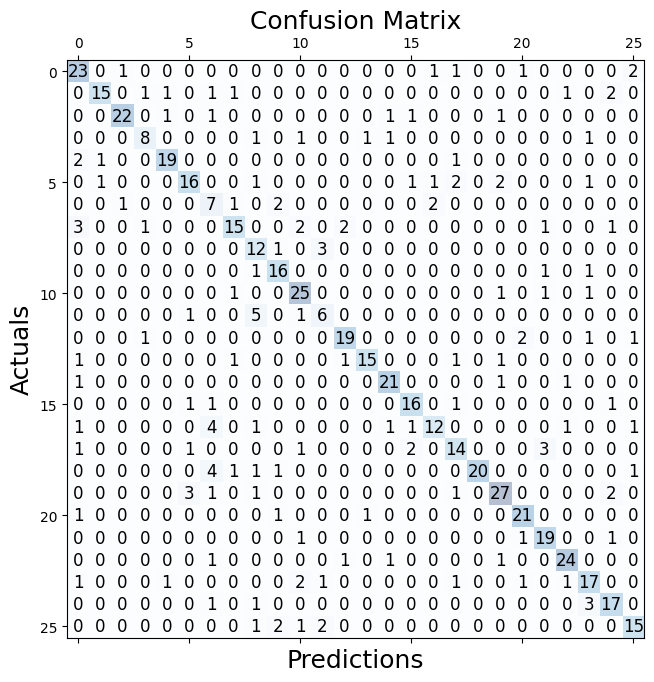

In [67]:
matrix = confusion_matrix(y_test,y_predict)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


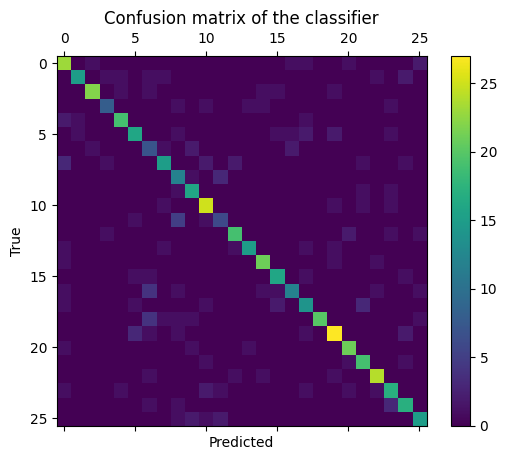

In [68]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
